In [231]:
import numpy as np
import pandas as pd
import piplite 
await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
df = pd.read_csv('day.csv')

In [233]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [234]:
df.shape

(730, 16)

In [235]:
# Seeing non null variables and type of each 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [236]:
# Seeing statistic of each variable(inlcuding numeric values of categorical vaues)
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


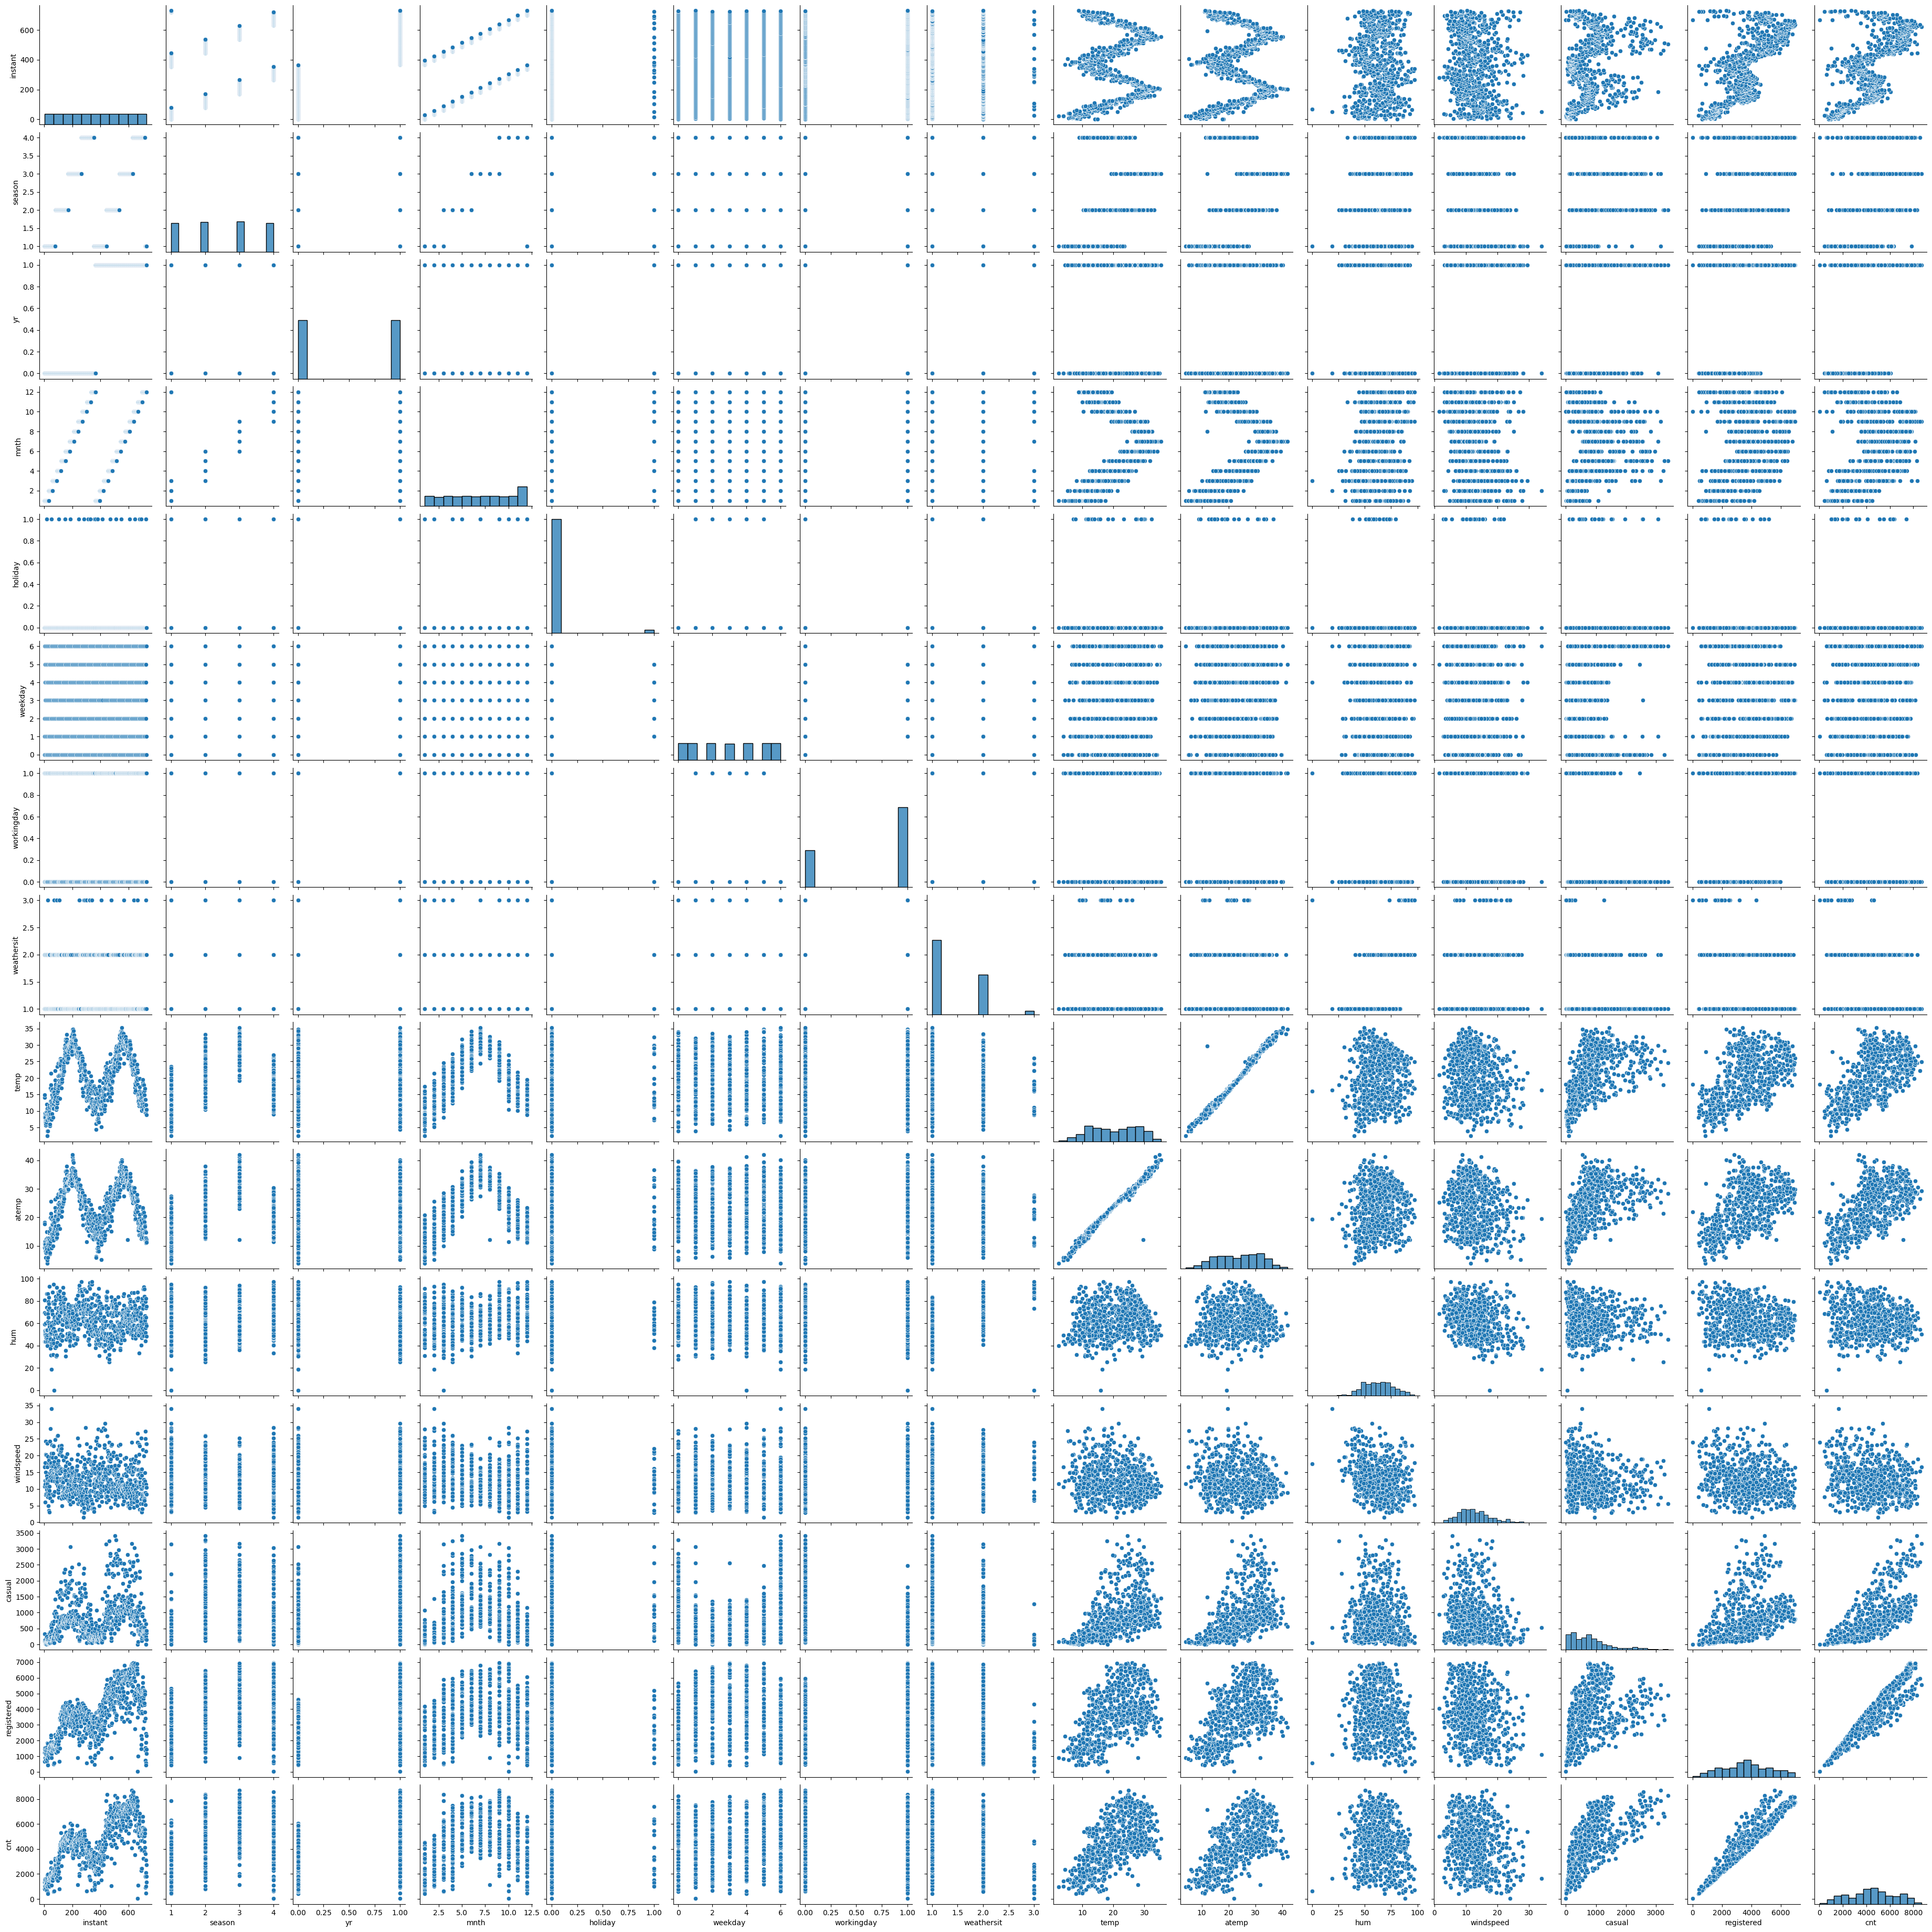

In [237]:
# Plotting scatterplot for 1-1 variables to see correlation between each other 
sns.pairplot(df)

<ipython-input-239-76cddf05e60f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

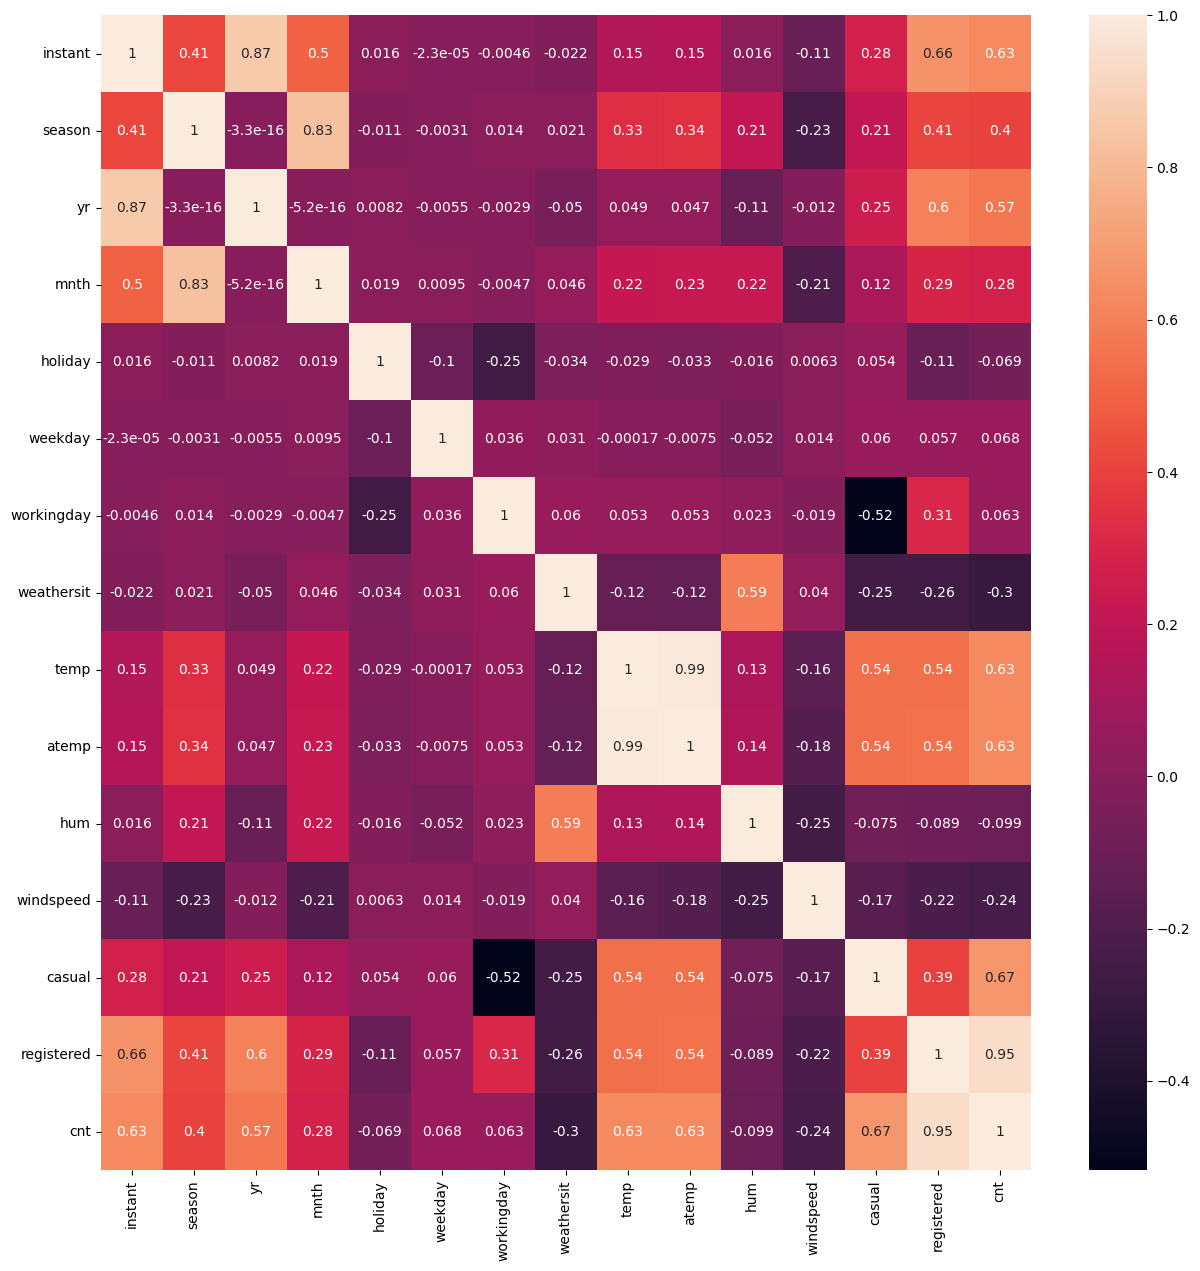

In [239]:
# plot the correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [240]:
# 1. As we can see since count is a derived metric i.e. registered + casual, those two are linearly affecting cnt. Also these can be dropped. 
# As cnt is dervied from them
# 2. Temp amd atemp are linearly related highly
# 3. We can see multiple colinearity among independent variables 


<AxesSubplot:xlabel='season', ylabel='cnt'>

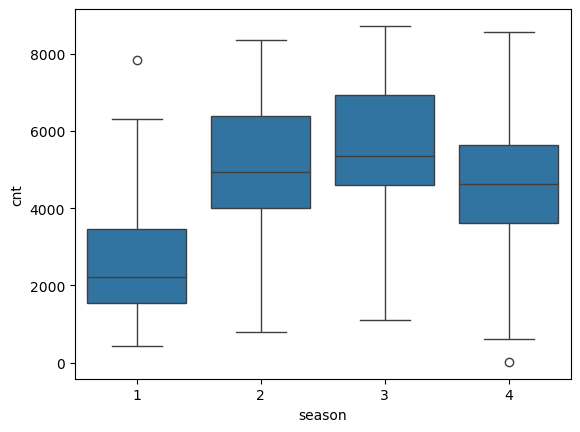

In [24]:
sns.boxplot(y='cnt',x='season',data=df)

In [241]:
# As we can see for season category variable, an increasing trend from 1,2,3

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

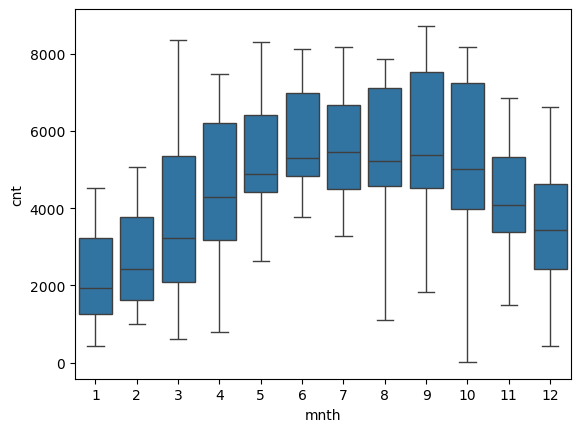

In [25]:
sns.boxplot(y='cnt',x='mnth',data=df)

In [242]:
# As we can see for month category variable, an increasing trend from 1 to 7 and downward trend from 8-12

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

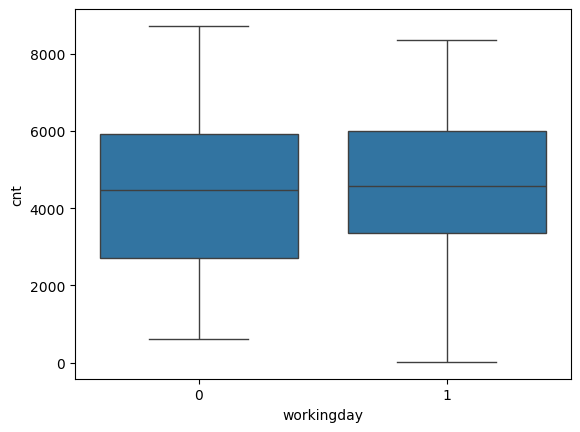

In [26]:
sns.boxplot(y='cnt',x='workingday',data=df)

In [243]:
# As we can see for workinday category variable, there is no strong differnce

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

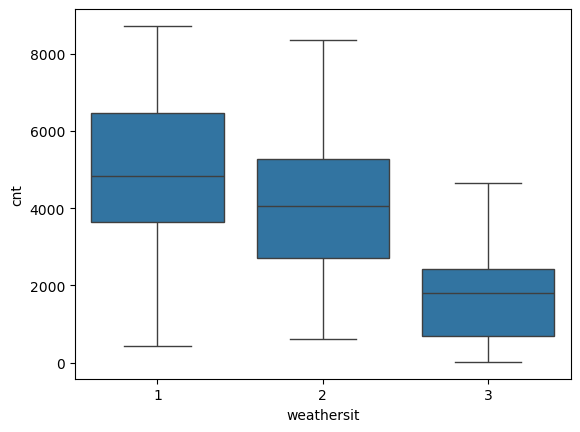

In [246]:
sns.boxplot(y='cnt',x='weathersit',data=df)

In [244]:
# As we can see for weathersit category variable, a decreaing trend
# We will use mapping for only three as dataset only has 3 levels.

In [245]:
# Converting numerical categorical values to String

In [247]:
my_mapping = {1: "clear", 2: "mist", 3: "rainy"}
df['weathersit'] = df['weathersit'].map(my_mapping)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [248]:
my_mapping = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
df['season'] = df['season'].map(my_mapping)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [249]:
my_mapping = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
df['mnth'] = df['mnth'].map(my_mapping)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [250]:
my_mapping = {6:"Mon", 0:"Tue", 1:"Wed", 2:"Thu", 3:"Fri", 4:"Sat", 5:"Sun"}
df['weekday'] = df['weekday'].map(my_mapping)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [251]:
# Dropping few variables 
# 1. Instant- As this denotes rown number and is not a significant attribute from business sense
# 2. dteday- Denotes date, which is denoted by month season and yr variables
# 3. Casual and registered- cnt is dervied from them and hence they are strongly correlated. Tried using these 2 variables to create linear regression model
# but the R2 score was very high i.e. 1 due to strict co-relation between registered and casual 
df_dropped = df.drop(['instant','dteday','casual','registered'], axis=1)

In [252]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 57.1+ KB


In [253]:
# create dummy variables from category and remove the first and the parent variable
X = pd.get_dummies(data=df_dropped, drop_first=True)
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [254]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   season_spring     730 non-null    uint8  
 9   season_summer     730 non-null    uint8  
 10  season_winter     730 non-null    uint8  
 11  mnth_Aug          730 non-null    uint8  
 12  mnth_Dec          730 non-null    uint8  
 13  mnth_Feb          730 non-null    uint8  
 14  mnth_Jan          730 non-null    uint8  
 15  mnth_July         730 non-null    uint8  
 16  mnth_Jun          730 non-null    uint8  
 1

In [255]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
X.columns
print(X.columns.tolist())

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_mist', 'weathersit_rainy']


In [256]:
# creating a training and testing set with 70-30 split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(511, 30)
(219, 30)


In [257]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_rainy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [258]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_rainy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,20.106483,23.499390,63.109443,12.833686,4491.303327,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.154599,0.133072,0.127202,0.133072,0.142857,0.150685,0.344423,0.029354
std,0.500412,0.157613,0.468042,7.424445,8.083052,14.142965,5.286912,1953.413860,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.361876,0.339986,0.333525,0.339986,0.350270,0.358092,0.475645,0.168963
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.649576,16.634475,52.291650,9.041918,3123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.260847,24.115200,63.416700,12.124789,4539.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.208350,15.750595,6008.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [259]:
# scaling using min max algorithm, fitting to training set.
from sklearn import preprocessing
min_max_scaler_train = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler_train.fit_transform(X_train)
train_scaled_df = pd.DataFrame(train_scaled, columns = X_train.columns)

In [260]:
train_scaled_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_rainy
0,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [261]:
train_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                511 non-null    float64
 1   holiday           511 non-null    float64
 2   workingday        511 non-null    float64
 3   temp              511 non-null    float64
 4   atemp             511 non-null    float64
 5   hum               511 non-null    float64
 6   windspeed         511 non-null    float64
 7   cnt               511 non-null    float64
 8   season_spring     511 non-null    float64
 9   season_summer     511 non-null    float64
 10  season_winter     511 non-null    float64
 11  mnth_Aug          511 non-null    float64
 12  mnth_Dec          511 non-null    float64
 13  mnth_Feb          511 non-null    float64
 14  mnth_Jan          511 non-null    float64
 15  mnth_July         511 non-null    float64
 16  mnth_Jun          511 non-null    float64
 1

In [262]:
train_scaled_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_rainy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.514186,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.154599,0.133072,0.127202,0.133072,0.142857,0.150685,0.344423,0.029354
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.224737,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.361876,0.339986,0.333525,0.339986,0.350270,0.358092,0.475645,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.519673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.688737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [263]:
# splitting Y and X for training
y_train = train_scaled_df.pop('cnt')
X_train_1 = train_scaled_df

In [264]:
y_train.head()

0    0.864243
1    0.827658
2    0.465255
3    0.204096
4    0.482973
Name: cnt, dtype: float64

In [265]:
X_train_1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_rainy
0,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [266]:
# Creating first model for seeing how the model trains and what are the insignificant variables through p val and VIF

In [267]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train_1)

In [268]:
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.28
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.03e-180
Time:                        13:38:26   Log-Likelihood:                 526.79
No. Observations:                 511   AIC:                            -995.6
Df Residuals:                     482   BIC:                            -872.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.275e+11    6.9e+11  

In [269]:
# 1.R2 is 0.852 and Adj R2 is 0.844
# 2. F-stats score is 99 and prob(F) is low showing that the model is significant
# 3 But we see many variables with high p values, like atemp, weekday_sat, mnth_OCt, mnth_Jun and Mar and many others, showing that Many variables 
# are insignificant
# Need to check for VIF for coliniearity amng variables

In [274]:
# Using RFE, select the most important variables i.e selecting best 20

In [271]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = LinearRegression()
lm.fit(X_train_1, y_train)

# Selecting 20 variables at start
rfe = RFE(lm, n_features_to_select = 20)
rfe = rfe.fit(X_train_1, y_train)

In [273]:
list(zip(X_train_1.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 5),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 4),
 ('weathersit_mist', True, 1),
 ('weathersit_rainy', True, 1)]

In [275]:
# Selecting the rfe supported variables
col = X_train_1.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'weekday_Mon', 'weekday_Tue', 'weathersit_mist', 'weathersit_rainy'],
      dtype='object')


In [276]:
X_train_1.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Wed'],
      dtype='object')

In [277]:
X_train_rfe = X_train_1[col]

In [278]:
# Function to list out the VIF score of each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [279]:
# Checking for VIF for coliniearity amng variables
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,59.16
2,workingday,58.58
4,atemp,53.87
16,weekday_Mon,13.95
17,weekday_Tue,13.36
7,season_spring,5.80
9,season_winter,3.98
1,holiday,3.33
8,season_summer,2.94
12,mnth_Jan,2.37


In [280]:
# Seeing few variables like temp, atemp, working day, mon and Tue in high VIF scores

In [282]:
# Train model again to see how model performs after doing RFE and removing few variables
# Lets see which variabes has high p values as well

In [283]:
X_train_lr_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.1
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.08e-188
Time:                        13:53:07   Log-Likelihood:                 523.95
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     491   BIC:                            -923.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.547e+11   6.79e+11  

In [284]:
# 1. Previusly, R2 was 0.852 and Adj R2 was 0.844, now its 0.851 and 0.845
# Since Adjusted R2 score has increased(with R2 almost same) hence we can conclude that removing variables through RFE has worked.
# 2. F-stats score was 99 and prob(F) was low, now F score increased to 147 showing that the model is more significant and better
# But we still see few variables with high p values

In [285]:
#dropping high VIF and high P
# As atemp shows high VIF values and high p values hence we can drop it
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,workingday,58.52
15,weekday_Mon,13.93
16,weekday_Tue,13.35
6,season_spring,5.69
3,temp,4.73
8,season_winter,3.85
1,holiday,3.32
7,season_summer,2.82
11,mnth_Jan,2.37
4,hum,1.94


In [287]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.10e-189
Time:                        13:57:15   Log-Likelihood:                 523.69
No. Observations:                 511   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -928.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.438e+11    6.8e+11  

In [288]:
#dropping high VIF and high P
# As workingday shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['workingday'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,hum,31.84
2,temp,18.42
5,season_spring,5.47
4,windspeed,4.77
7,season_winter,4.09
6,season_summer,2.83
10,mnth_Jan,2.38
16,weathersit_mist,2.34
0,yr,2.10
9,mnth_Feb,1.92


In [289]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.42e-190
Time:                        13:57:47   Log-Likelihood:                 525.27
No. Observations:                 511   AIC:                            -1013.
Df Residuals:                     492   BIC:                            -932.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3322      0.036  

In [290]:
#dropping high VIF
# As hum shows high VIF value hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.32
3,windspeed,4.71
4,season_spring,4.36
6,season_winter,3.03
5,season_summer,2.25
9,mnth_Jan,2.21
0,yr,2.08
8,mnth_Feb,1.88
11,mnth_Nov,1.81
10,mnth_July,1.60


In [291]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          4.21e-188
Time:                        13:59:00   Log-Likelihood:                 517.22
No. Observations:                 511   AIC:                            -998.4
Df Residuals:                     493   BIC:                            -922.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2652      0.033  

In [292]:
#dropping high p value
# As weekday_Mon shows high p value hence we can drop it
X_train_new = X_train_new.drop(['weekday_Mon'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.28
3,windspeed,4.68
4,season_spring,4.34
6,season_winter,3.01
5,season_summer,2.25
9,mnth_Jan,2.21
0,yr,2.08
8,mnth_Feb,1.88
11,mnth_Nov,1.81
10,mnth_July,1.60


In [293]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     170.0
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          5.21e-189
Time:                        13:59:26   Log-Likelihood:                 516.70
No. Observations:                 511   AIC:                            -999.4
Df Residuals:                     494   BIC:                            -927.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2675      0.033  

In [294]:
#dropping high p value
# As mnth_Feb shows high p value hence we can drop it
X_train_new = X_train_new.drop(['mnth_Feb'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.22
3,windspeed,4.68
6,season_winter,2.97
4,season_spring,2.92
5,season_summer,2.25
0,yr,2.08
10,mnth_Nov,1.80
8,mnth_Jan,1.66
9,mnth_July,1.60
13,weathersit_mist,1.57


In [295]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.66e-189
Time:                        13:59:44   Log-Likelihood:                 515.17
No. Observations:                 511   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2544      0.032  

In [296]:
#dropping high p value
# As mnth_Nov shows high p value hence we can drop it
X_train_new = X_train_new.drop(['mnth_Nov'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.19
3,windspeed,4.63
4,season_spring,2.91
5,season_summer,2.25
6,season_winter,2.09
0,yr,2.08
8,mnth_Jan,1.65
9,mnth_July,1.60
12,weathersit_mist,1.57
10,mnth_Sep,1.34


In [298]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.2
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.61e-189
Time:                        14:00:31   Log-Likelihood:                 512.46
No. Observations:                 511   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -931.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2361      0.031  

In [299]:
#dropping high p value
# As mnth_Dec shows high p value hence we can drop it
X_train_new = X_train_new.drop(['mnth_Dec'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.19
3,windspeed,4.62
4,season_spring,2.78
5,season_summer,2.24
0,yr,2.08
6,season_winter,1.82
7,mnth_Jan,1.61
8,mnth_July,1.59
11,weathersit_mist,1.57
9,mnth_Sep,1.34


In [300]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.5
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          7.11e-190
Time:                        14:00:46   Log-Likelihood:                 510.53
No. Observations:                 511   AIC:                            -993.1
Df Residuals:                     497   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2217      0.030  

In [301]:
#dropping high p value
# As mnth_Jan shows high p value hence we can drop it
X_train_new = X_train_new.drop(['mnth_Jan'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.15
3,windspeed,4.61
5,season_summer,2.24
4,season_spring,2.11
0,yr,2.07
6,season_winter,1.82
7,mnth_July,1.59
10,weathersit_mist,1.55
8,mnth_Sep,1.34
9,weekday_Tue,1.18


In [302]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.5
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          5.26e-190
Time:                        14:00:59   Log-Likelihood:                 508.04
No. Observations:                 511   AIC:                            -990.1
Df Residuals:                     498   BIC:                            -935.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2055      0.029  

In [303]:
#dropping high p value
# As mnth_July shows high p value hence we can drop it
X_train_new = X_train_new.drop(['mnth_July'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,yr,2.07
4,season_spring,2.02
5,season_summer,1.91
6,season_winter,1.66
9,weathersit_mist,1.55
7,mnth_Sep,1.23
8,weekday_Tue,1.18
10,weathersit_rainy,1.08


In [304]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.19e-189
Time:                        14:01:12   Log-Likelihood:                 504.36
No. Observations:                 511   AIC:                            -984.7
Df Residuals:                     499   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1975      0.029  

In [305]:
#dropping high p value
# As season_spring shows high p value hence we can drop it
X_train_new = X_train_new.drop(['season_spring'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.73
3,windspeed,3.09
0,yr,2.01
4,season_summer,1.57
8,weathersit_mist,1.48
5,season_winter,1.39
6,mnth_Sep,1.21
7,weekday_Tue,1.16
9,weathersit_rainy,1.08
1,holiday,1.04


In [306]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.21e-189
Time:                        14:01:23   Log-Likelihood:                 500.84
No. Observations:                 511   AIC:                            -979.7
Df Residuals:                     500   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1343      0.017  

In [203]:
# All the variables have low p value and the model F statistic score is also good, hence finalising the procedure of feature selection and model building

In [307]:
# R-squared:                       0.836
# Adj. R-squared:                  0.833
# F-statistic:                     255.7
# Prob (F-statistic):          2.21e-189

In [309]:
lr_1.params

const               0.134280
yr                  0.233255
holiday            -0.107191
temp                0.547312
windspeed          -0.152947
season_summer       0.087771
season_winter       0.132279
mnth_Sep            0.099113
weekday_Tue        -0.050260
weathersit_mist    -0.081004
weathersit_rainy   -0.289030
dtype: float64

In [310]:
# Predict for train variables
y_train_pred = lr_1.predict(X_train_lr_1)

In [311]:
# Seeing whether the residual errors are normalised for training set

<ipython-input-312-686e4ac1baf9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

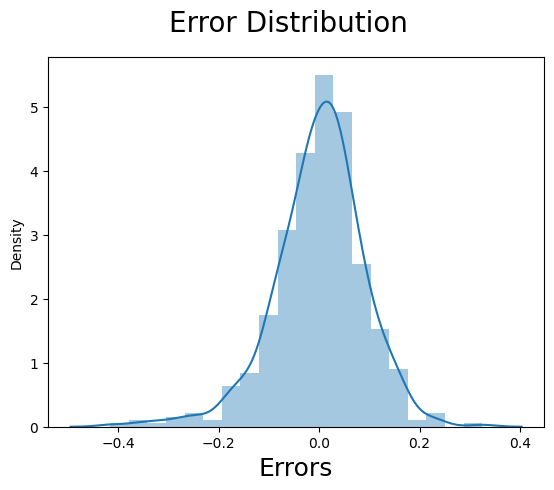

In [312]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Distribution', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [313]:
# We can see the mean of residuals is 0
# The distribution follows a Normal distribution

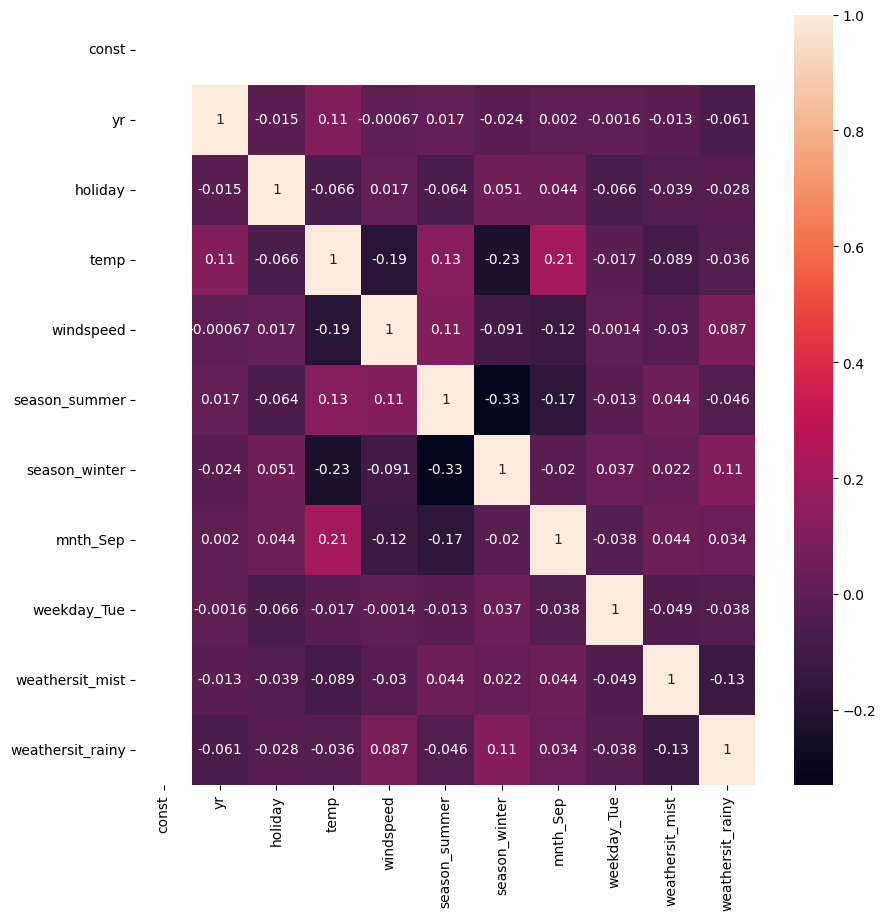

In [314]:
# Seeing the correlation of all sleceted variables
plt.figure(figsize=(10,10))
sns.heatmap(X_train_lr_1.corr(),annot = True)
plt.show()

In [315]:
# See VIF of final variables
calculateVIF(X_train_lr_1)

,Features,VIF
0,const,16.77
6,season_winter,1.21
3,temp,1.20
5,season_summer,1.19
7,mnth_Sep,1.11
4,windspeed,1.09
10,weathersit_rainy,1.05
9,weathersit_mist,1.04
1,yr,1.02
2,holiday,1.02


In [316]:
# Seeing no multicolinearity among variables as seen from correlation heatmap and VIF scores.

In [317]:
# Homoscedasticity

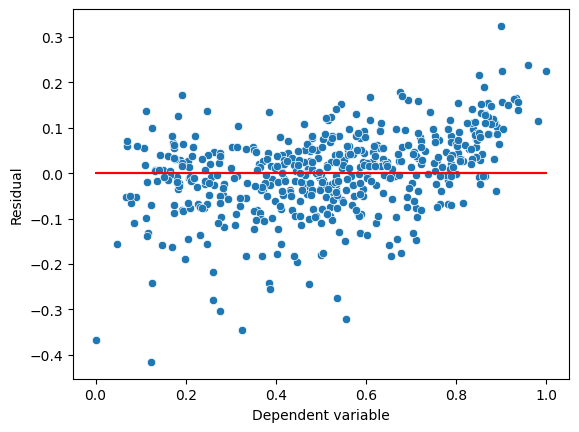

In [320]:
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y= residual)
plt.plot(y_train,y_train-y_train, '-r')
plt.xlabel('Dependent variable')
plt.ylabel('Residual')
plt.show()

In [321]:
# As we can see there is no specific patterns, and the resiudal seem to have a constant variance
# hence Homoscedasticity is present

In [323]:
# Checking for Linearity between variables and dependent variables
# Linear relationship validation using CCPR plot, i.e. Component and Component plus residual plot

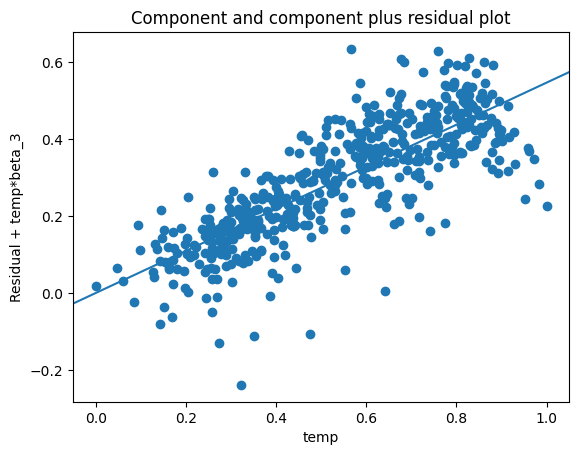

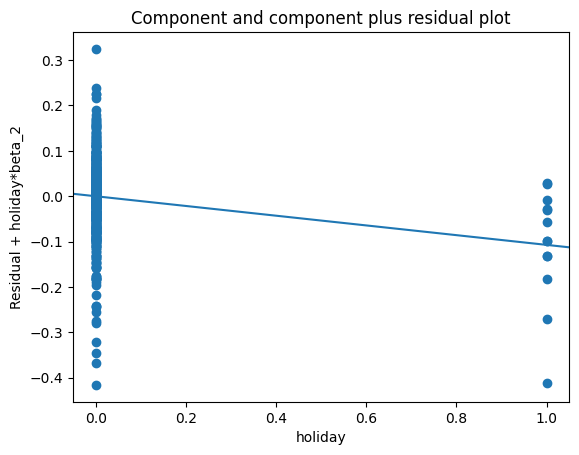

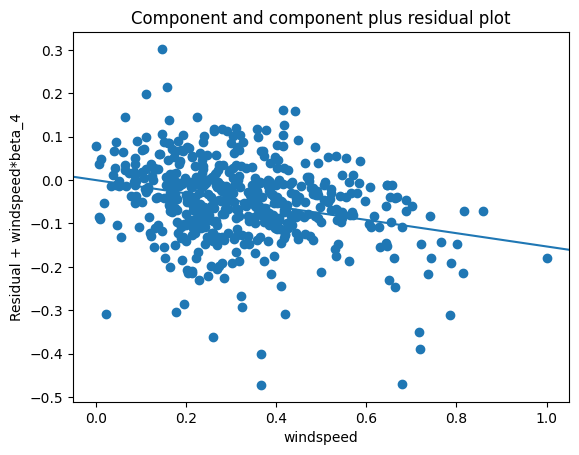

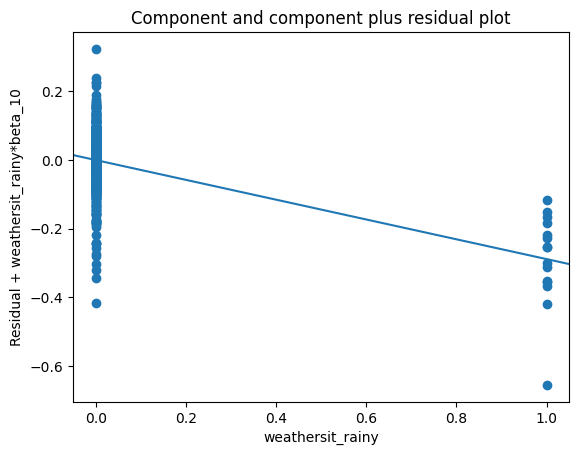

In [324]:
sm.graphics.plot_ccpr(lr_1, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_1, 'holiday')
plt.show()

sm.graphics.plot_ccpr(lr_1, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_1, 'weathersit_rainy')
plt.show()

In [325]:
# As we can see form above plots, the linearity is there between variables and the dependent variable

In [326]:
# FinalTesting

In [327]:
# Scale Test set
test_scaled = min_max_scaler_train.transform(X_test)
test_scaled_df = pd.DataFrame(test_scaled, columns = X_test.columns)
test_scaled_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_rainy
0,0.0,1.0,0.0,0.831783,0.769660,0.657364,0.084219,0.692706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.901354,0.842587,0.610133,0.153728,0.712034,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.511964,0.496145,0.837699,0.334206,0.303382,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.881625,0.795343,0.437098,0.339570,0.547400,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.817246,0.741471,0.314298,0.537414,0.569029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
test_scaled_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_rainy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [329]:
y_test = test_scaled_df.pop('cnt')
X_test_1 = test_scaled_df

In [330]:
col1 = X_train_lr_1.columns
col1

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Sep', 'weekday_Tue', 'weathersit_mist',
       'weathersit_rainy'],
      dtype='object')

In [331]:
col1[1:]

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Sep', 'weekday_Tue', 'weathersit_mist', 'weathersit_rainy'],
      dtype='object')

In [332]:
X_test_1 = X_test_1[col1[1:]]
# Adding constant variable to test set
X_test_lr_1 = sm.add_constant(X_test_1)

In [333]:
y_pred = lr_1.predict(X_test_lr_1)

In [334]:
# Get the R2 of test set.
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7959

In [335]:
# Test R2 is 0.7959 

Text(0, 0.5, 'y_pred')

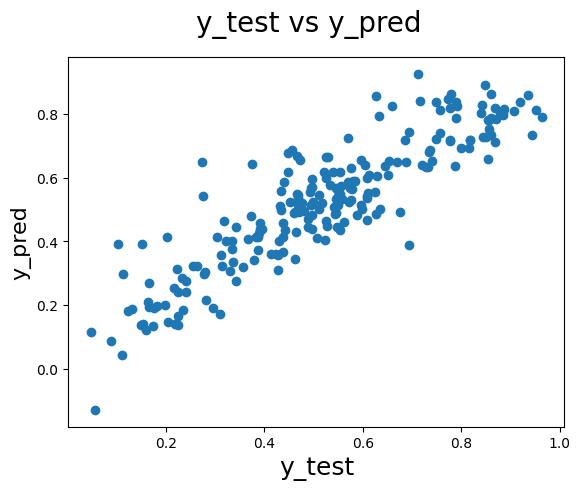

In [336]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

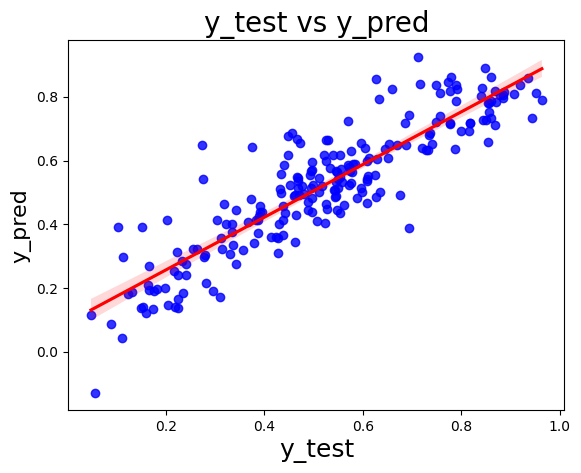

In [337]:
# plotting the Regression line and visualizing the fit of the model on test data
plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [338]:
# Adjusted-R2 of test dataset
adjusted_r2 = round(1-(1-r2)*(X_test_1.shape[0]-1)/(X_test_1.shape[0]-X_test_1.shape[1]-1),4)
adjusted_r2

0.786

In [339]:
lr_1.params

const               0.134280
yr                  0.233255
holiday            -0.107191
temp                0.547312
windspeed          -0.152947
season_summer       0.087771
season_winter       0.132279
mnth_Sep            0.099113
weekday_Tue        -0.050260
weathersit_mist    -0.081004
weathersit_rainy   -0.289030
dtype: float64

In [340]:
# Train and Test Comparison
# - Train dataset R^2          : 0.836
# - Train dataset Adjusted R^2 : 0.833
# - Test dataset R^2 : 0.7959    
# - Test dataset Adjusted R^2  : 0.786

In [341]:
# # Model Fit Assesment
# So, the parameters to assess a model are: 
# 1. t statistic: Used to determine the p-value and hence, helps in determining whether the coefficient is significant or not 
# 2. F statistic: Used to assess whether the overall model fit is significant or not. Generally, the higher the value of F statistic, the more significant a model turns out to be 
# 3. R-squared: After it has been concluded that the model fit is significant, the R-squared value tells the extent of the fit, i.e. 
# how well the straight line describes the variance in the data. Its value ranges from 0 to 1, with the value 1 being the best fit and the value 0 showcasing the worst. 

In [342]:
# 1. The p value of all the variables are 0, hence showing all the vriables are significatnt
# 2. F statistic of Model is heigh, hence showing the model is significant
# F-statistic:                     255.7
# Prob (F-statistic):          2.21e-189
# 3. R squared of both test and train set are significant and almost similar. That is the model uis aable to generalise well. 

In [343]:
lr_1.params

const               0.134280
yr                  0.233255
holiday            -0.107191
temp                0.547312
windspeed          -0.152947
season_summer       0.087771
season_winter       0.132279
mnth_Sep            0.099113
weekday_Tue        -0.050260
weathersit_mist    -0.081004
weathersit_rainy   -0.289030
dtype: float64

In [346]:
# Based on the model and the coefficients, the variables which are influencing cnt variables(bike rides) are:
# Temperature (Temp)
# Customers prefer Summer and pleasant temperature for bike booking

# Year (yr)
# Increase of sales in 2019 compared to 2018.

# Season
# It seems that customers prefered Summer and Winter season. 

# Weather
# Customer avoid during Misty and rainy weather and preferred clear and cloudy weather

# Holiday
# Customer tend to use bikes less on holidays and more on working days 